In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('portfolio_data.csv')

In [28]:
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [29]:
df["Date"] = pd.to_datetime(df["Date"])

<Figure size 1200x600 with 0 Axes>

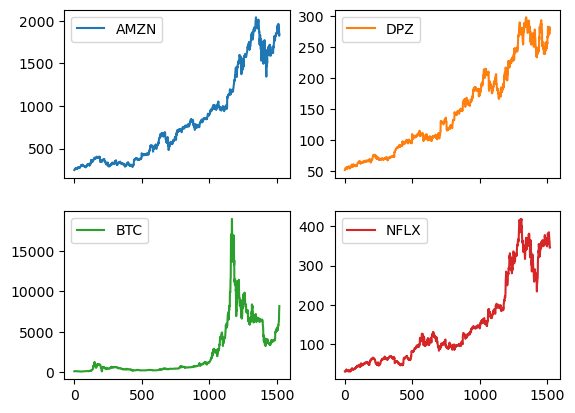

In [30]:
plt.figure(figsize=(12,6))
df[['AMZN', 'DPZ', 'BTC', 'NFLX']].plot(subplots=True, layout=(2,2))
plt.show();

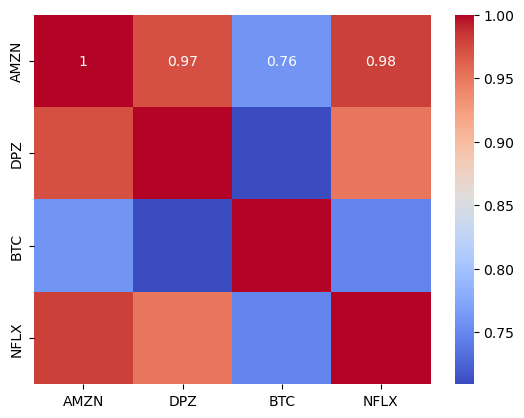

In [31]:
corr = df[['AMZN', 'DPZ', 'BTC', 'NFLX']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

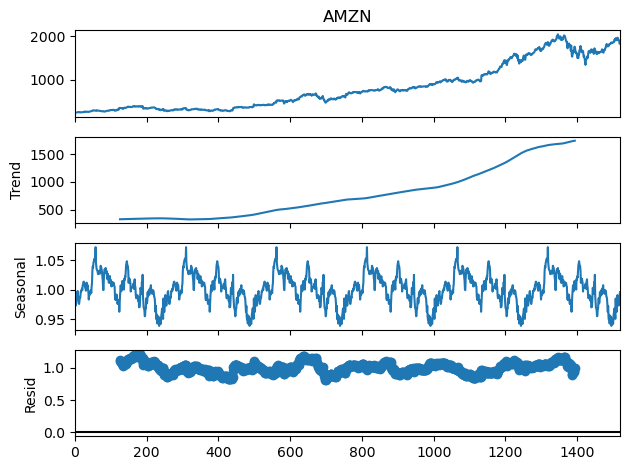

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

amzn_decomposition = seasonal_decompose(df['AMZN'], model='multiplicative', period=252)
amzn_decomposition.plot()
plt.show()

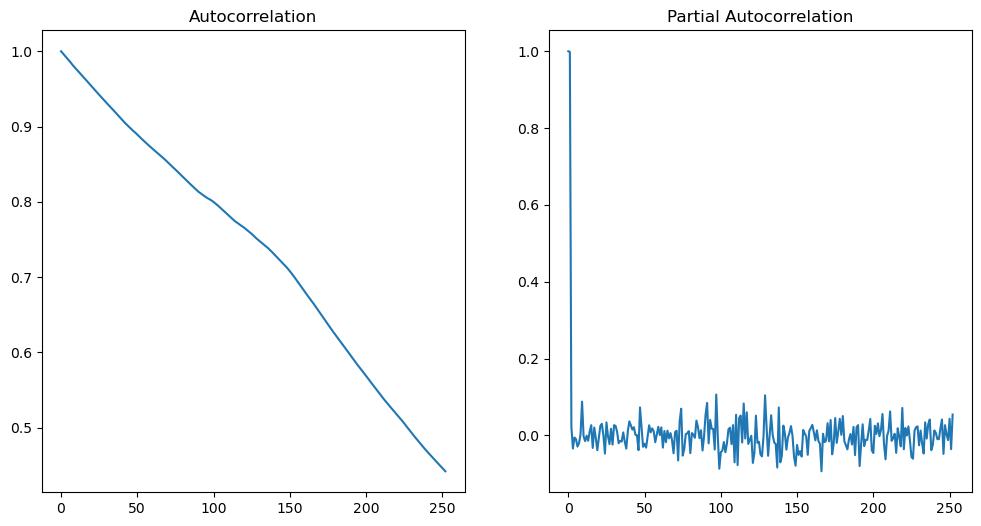

In [33]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df['AMZN'], nlags=252)
lag_pacf = pacf(df['AMZN'], nlags=252)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(lag_acf)
plt.title('Autocorrelation')
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation')
plt.show()